---

<h3 style='color: blue;text-align:center;'>FACETGRID</h3>

---

Un facet grid es como un tipo de gráfico, vamos a crear multiples gráficos para separar la información
Lo primero cargamos todos nuestros datos e importamos las librerias necesarias  (plt, sns..etc)

In [2]:
import pandas as pd
import os

In [4]:
peliculas = pd.read_csv('C://Users//CPU//Jupiter-docus//Seccion6-Datos//RatingsPeliculas.csv')

In [63]:
peliculas.head(0)

,Pelicula,Genero,Ratings de Rotten Tomatoes %,Ratings de la Audience %,Presupuesto (millones USD),Lanzamiento


In [6]:
#estandarizamos las columnas
peliculas.columns =['Pelicula', 'Genero', 'RatingsCriticos','RatingsAudiencia', 'PresupuestoMillones', 'Año']

In [8]:
peliculas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Pelicula             559 non-null    object
 1   Genero               559 non-null    object
 2   RatingsCriticos      559 non-null    int64 
 3   RatingsAudiencia     559 non-null    int64 
 4   PresupuestoMillones  559 non-null    int64 
 5   Año                  559 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [10]:
#Categorizamos Pelicula, Genero, Año
peliculas.Pelicula=peliculas.Pelicula.astype('category')
peliculas.Genero=peliculas.Genero.astype('category')
peliculas.Año= peliculas.Año.astype('category')

In [12]:
peliculas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Pelicula             559 non-null    category
 1   Genero               559 non-null    category
 2   RatingsCriticos      559 non-null    int64   
 3   RatingsAudiencia     559 non-null    int64   
 4   PresupuestoMillones  559 non-null    int64   
 5   Año                  559 non-null    category
dtypes: category(3), int64(3)
memory usage: 36.5 KB


In [14]:
#imports para el tratamiento de los datos
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

---

In [13]:
#Creando  un  FACET GRID

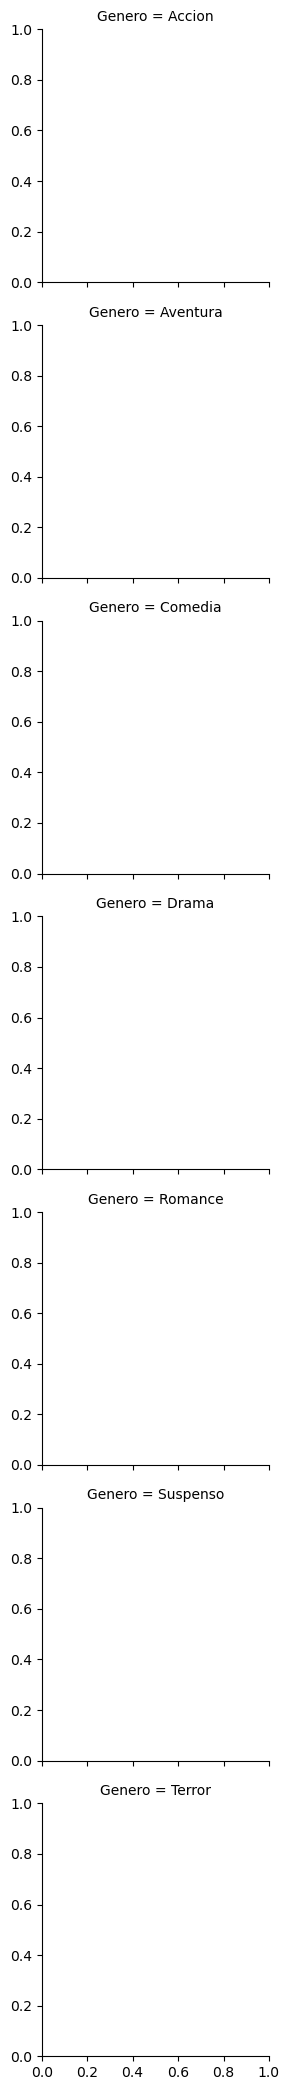

In [15]:
g = sns.FacetGrid(peliculas, row='Genero', hue='Genero')  #nos hace una cuadricula para cada Género, 
#es similar a los subplot pero ahora los gráficos se generan a partir de los datos, se llenan automaticamente según las reglas
#que le demos.


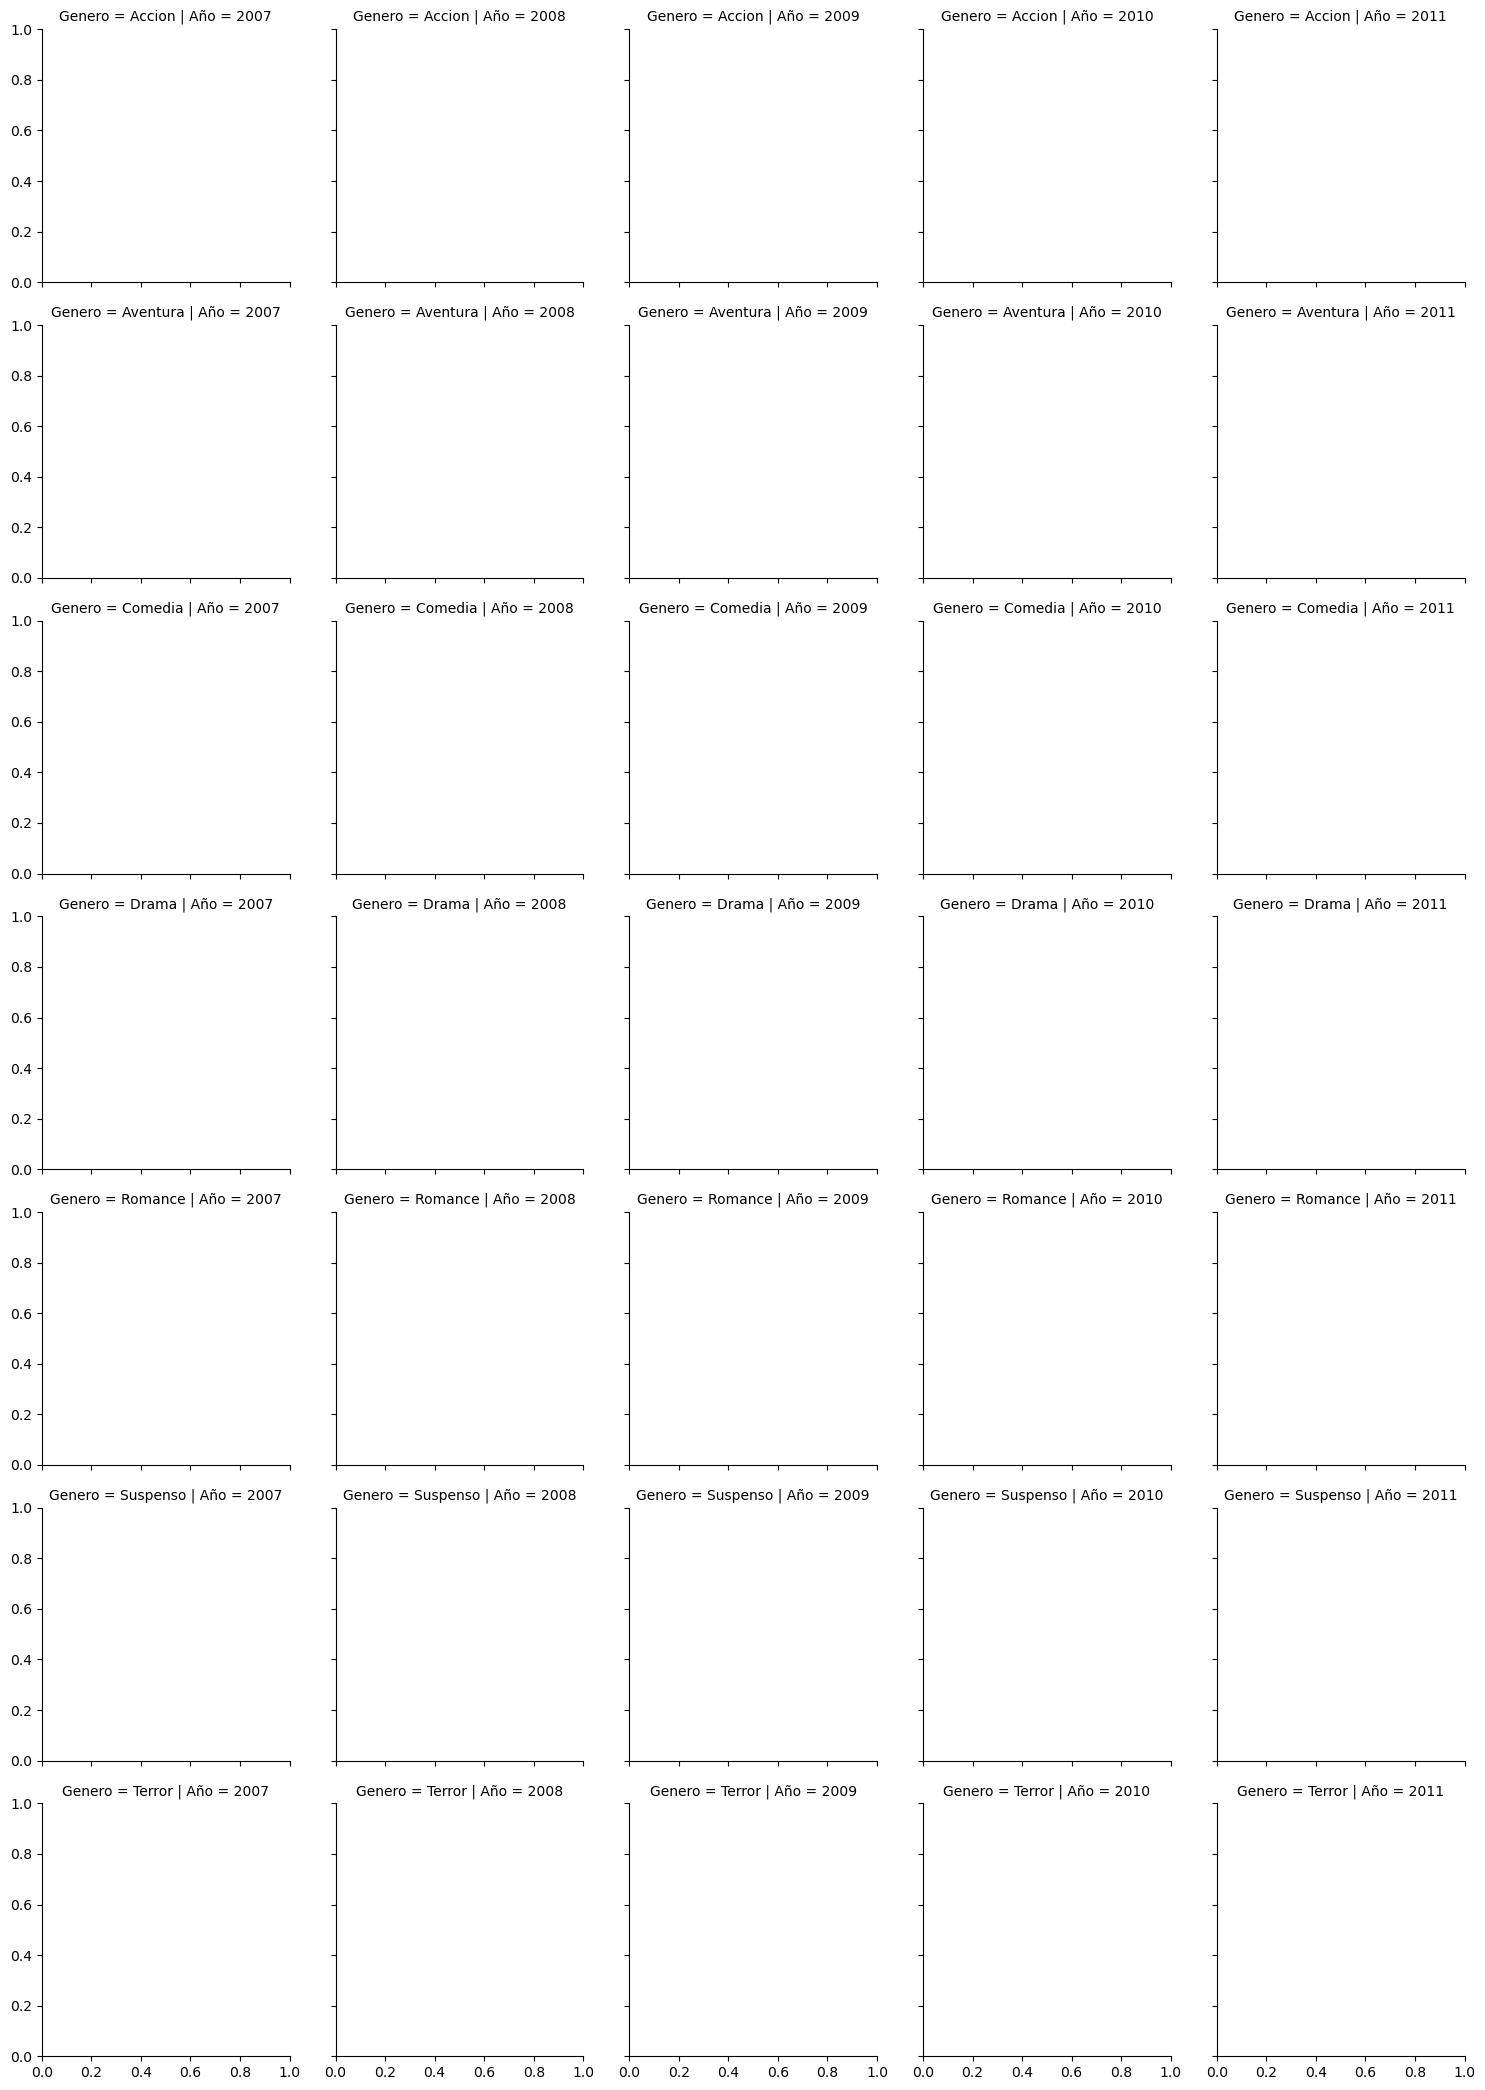

In [17]:
g = sns.FacetGrid(peliculas, row='Genero', col = 'Año', hue='Genero')  #nos hace una cuadricula para cada Género, y ahora le damos qen columnas nos ponga los años 


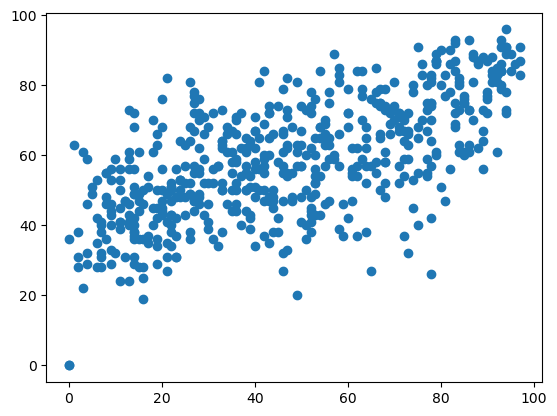

In [16]:
#vamos a rellenar los gráficos
#creamos un diagrama de dispersión.
#g = g.map()
#si hacemos el diagrama de dispersión con scatter
plt.scatter(peliculas.RatingsCriticos, peliculas.RatingsAudiencia)  #esta función la pasamos al mapeo
#  g= g.map(plt.scatter, peliculas.RatingsCriticos, peliculas.RatingsAudiencia  ) #esto tiene que estar en la misma celda que el FacetGrid 

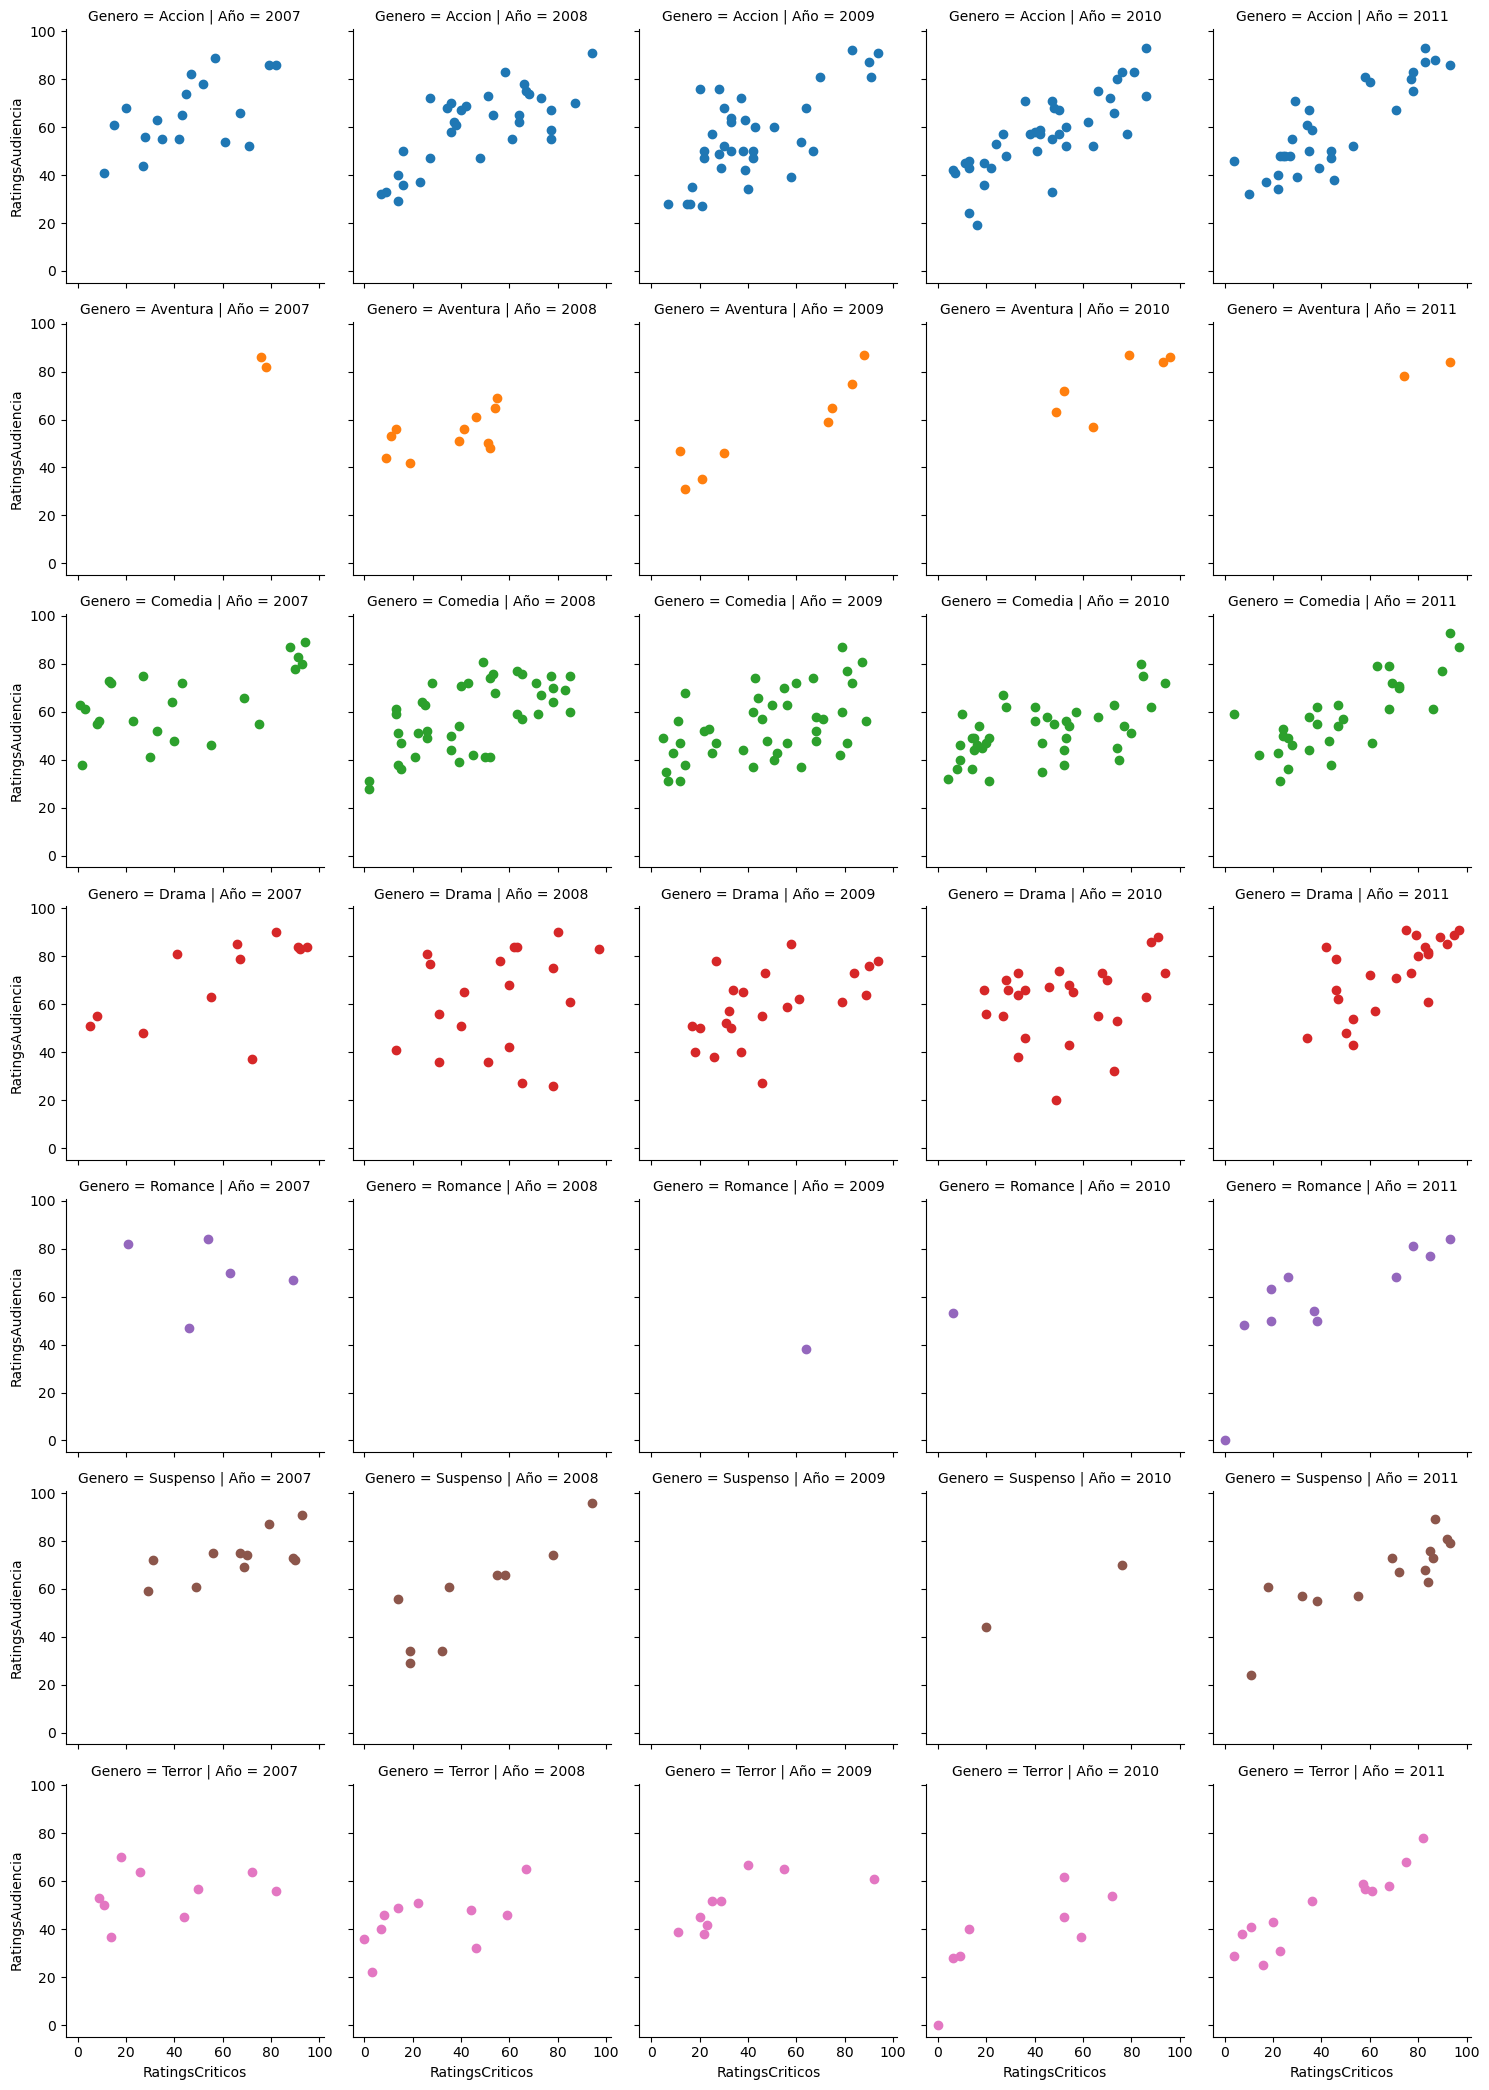

In [17]:
g = sns.FacetGrid(peliculas, row='Genero', col = 'Año', hue='Genero')  
g= g.map(plt.scatter, 'RatingsCriticos', 'RatingsAudiencia' )  
#podemos quitar el peliculas de peliculas.RatingsCriticos, peor hay que ponerlo entrecomillado, porque ya está definido en el g =sns...
#y se rellenan solitos-->

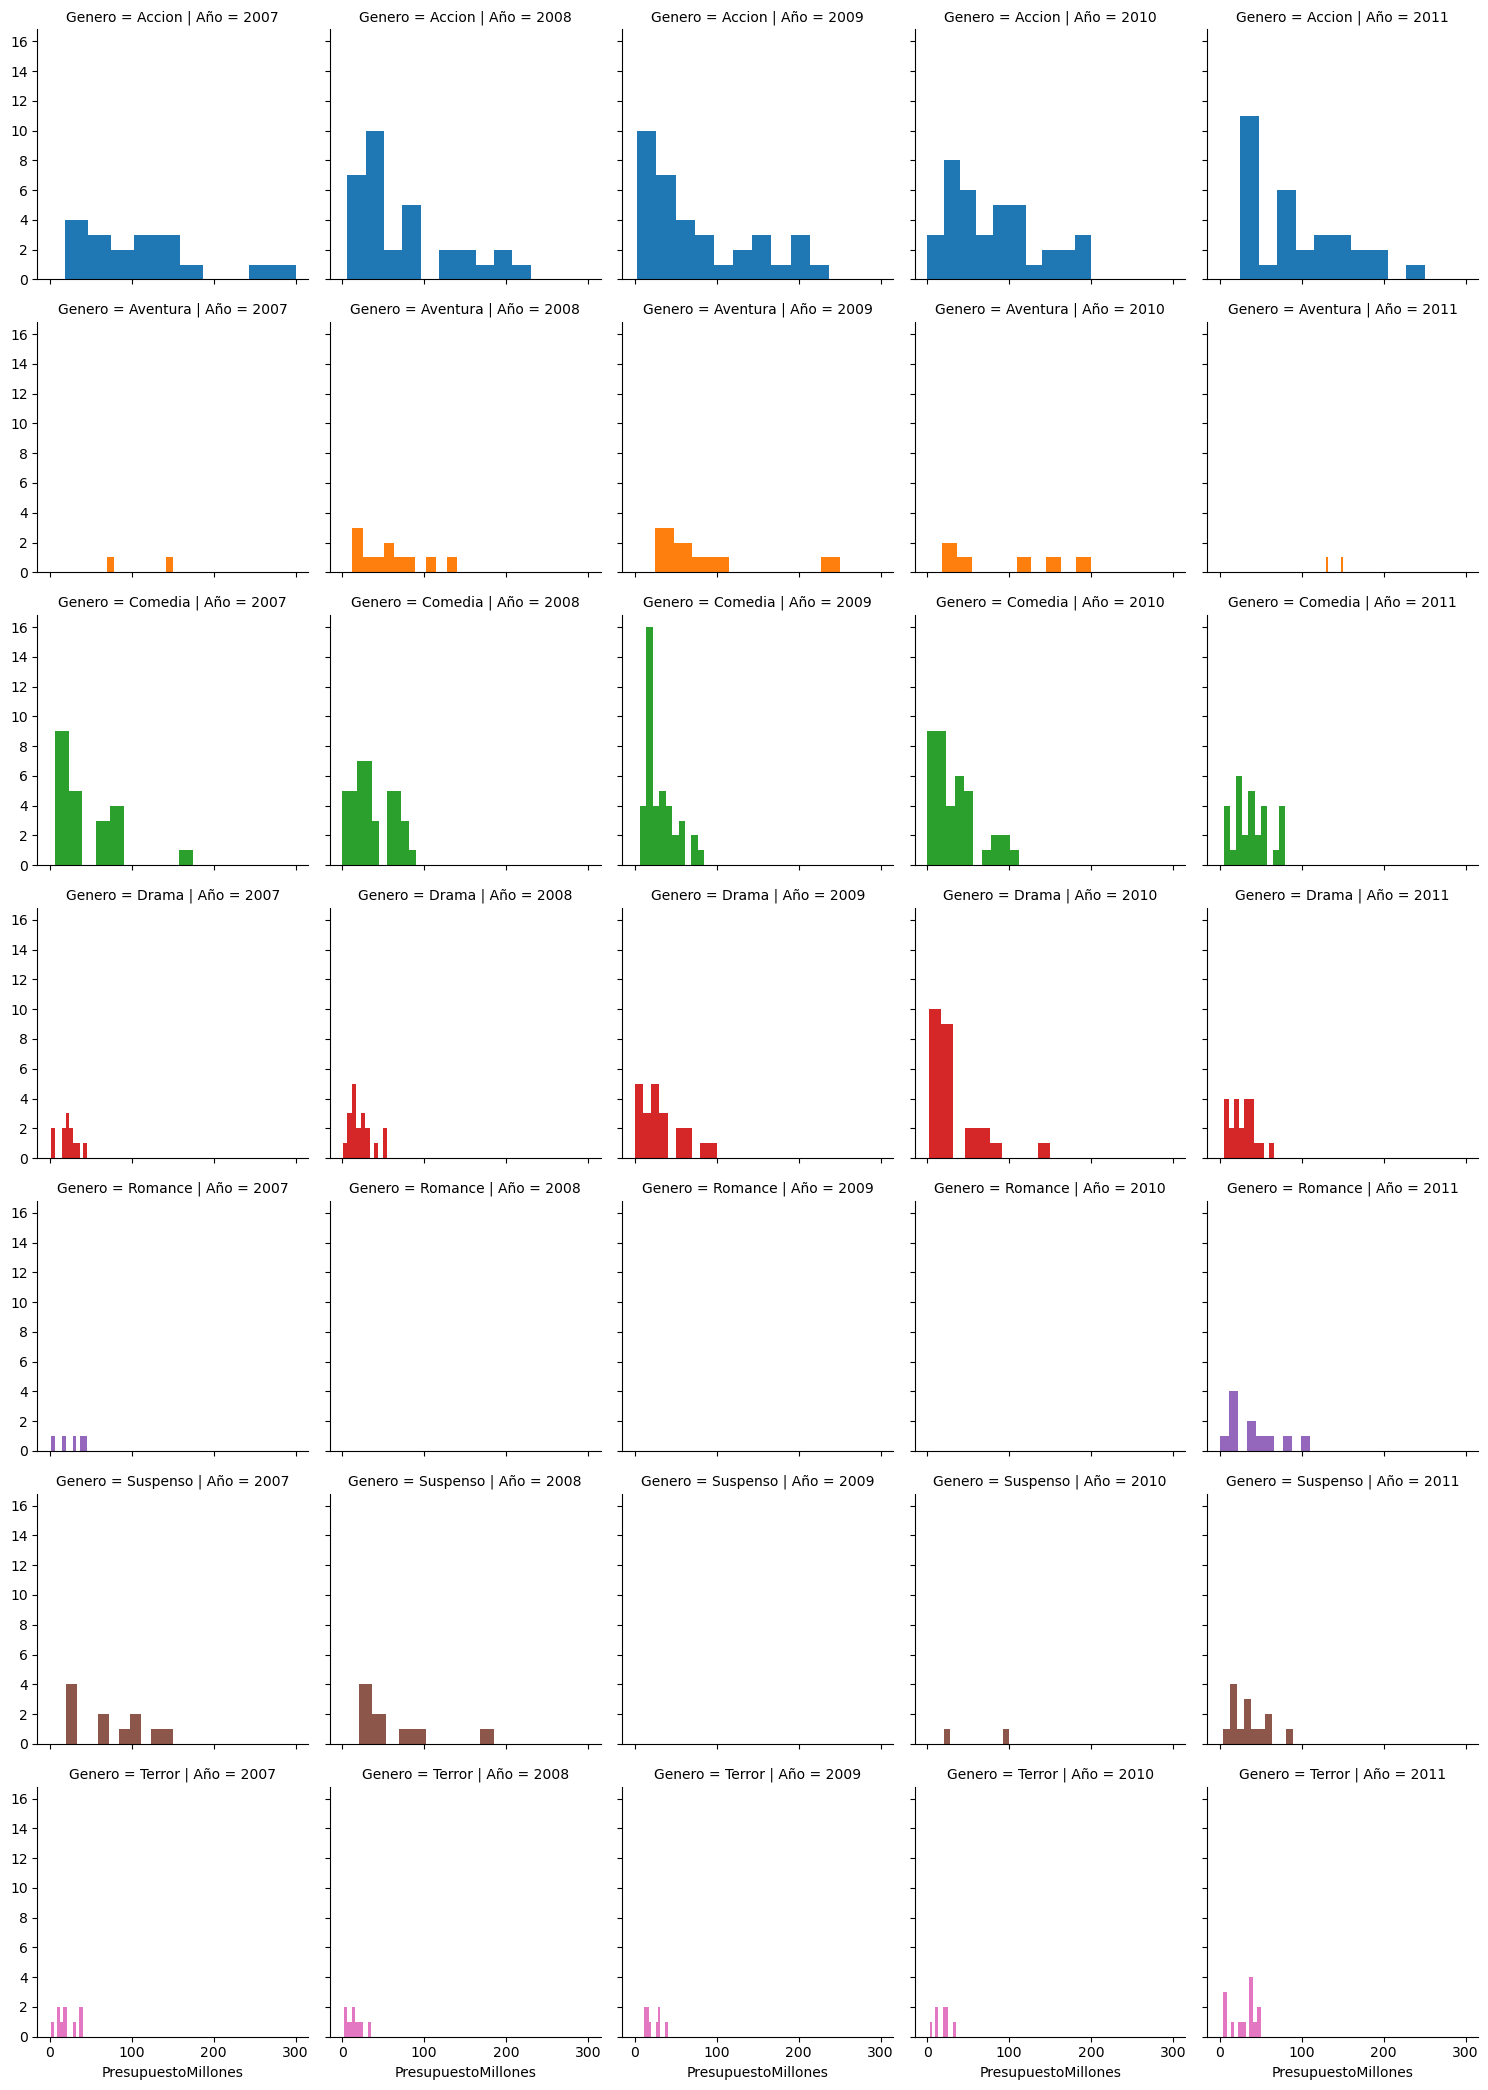

In [18]:
#se puede rellenar con cualquier tipo de gráfico, ej. HISTOGRAMAS

g = sns.FacetGrid(peliculas, row='Genero', col = 'Año', hue='Genero')  
g= g.map(plt.hist, 'PresupuestoMillones' ) 

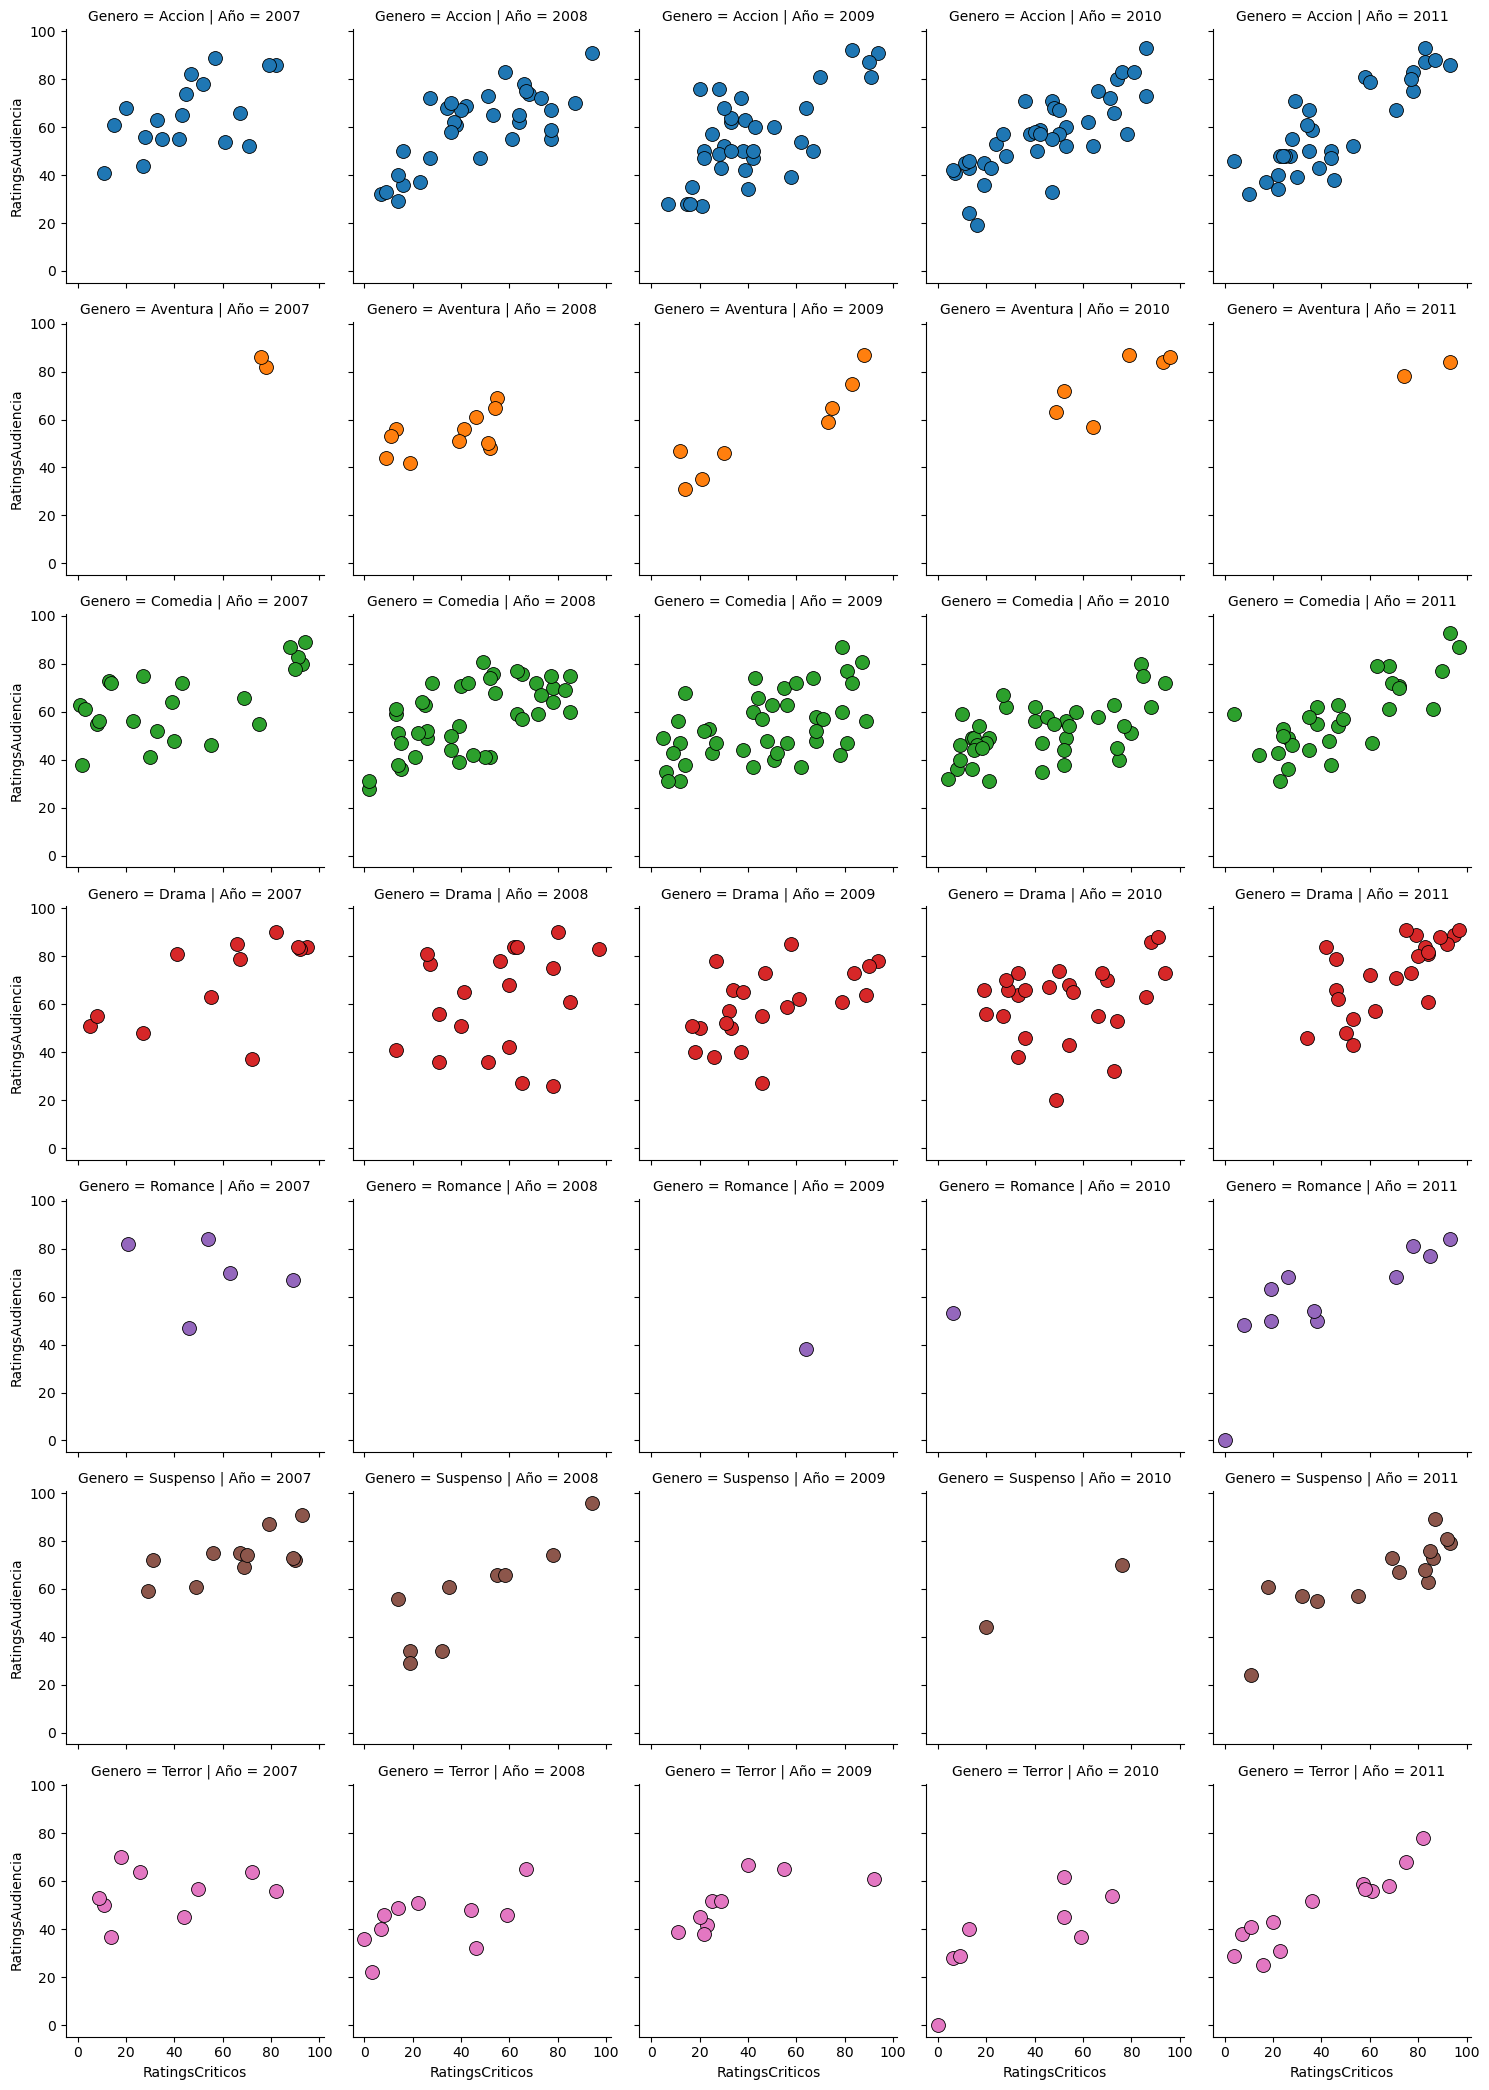

In [19]:
#Regreso a los diagramas 
#personalizar los marcadores, a través de un diccionario 
g = sns.FacetGrid(peliculas, row='Genero', col = 'Año', hue='Genero')  
kws= dict(s=100, linewidth = 0.6, edgecolor ='black')
g= g.map(plt.scatter, 'RatingsCriticos', 'RatingsAudiencia', **kws) #le cargamos el dicc kws con lo que le digamos en kws

In [20]:
kws

{'s': 100, 'linewidth': 0.6, 'edgecolor': 'black'}

---

<h2 style='color: blue;text-align:center;'>Coordenadas y Diagonales</h2>

---

In [22]:
#Vamos a añadir marcadores y diagonales para comparar mejor los gráficos:


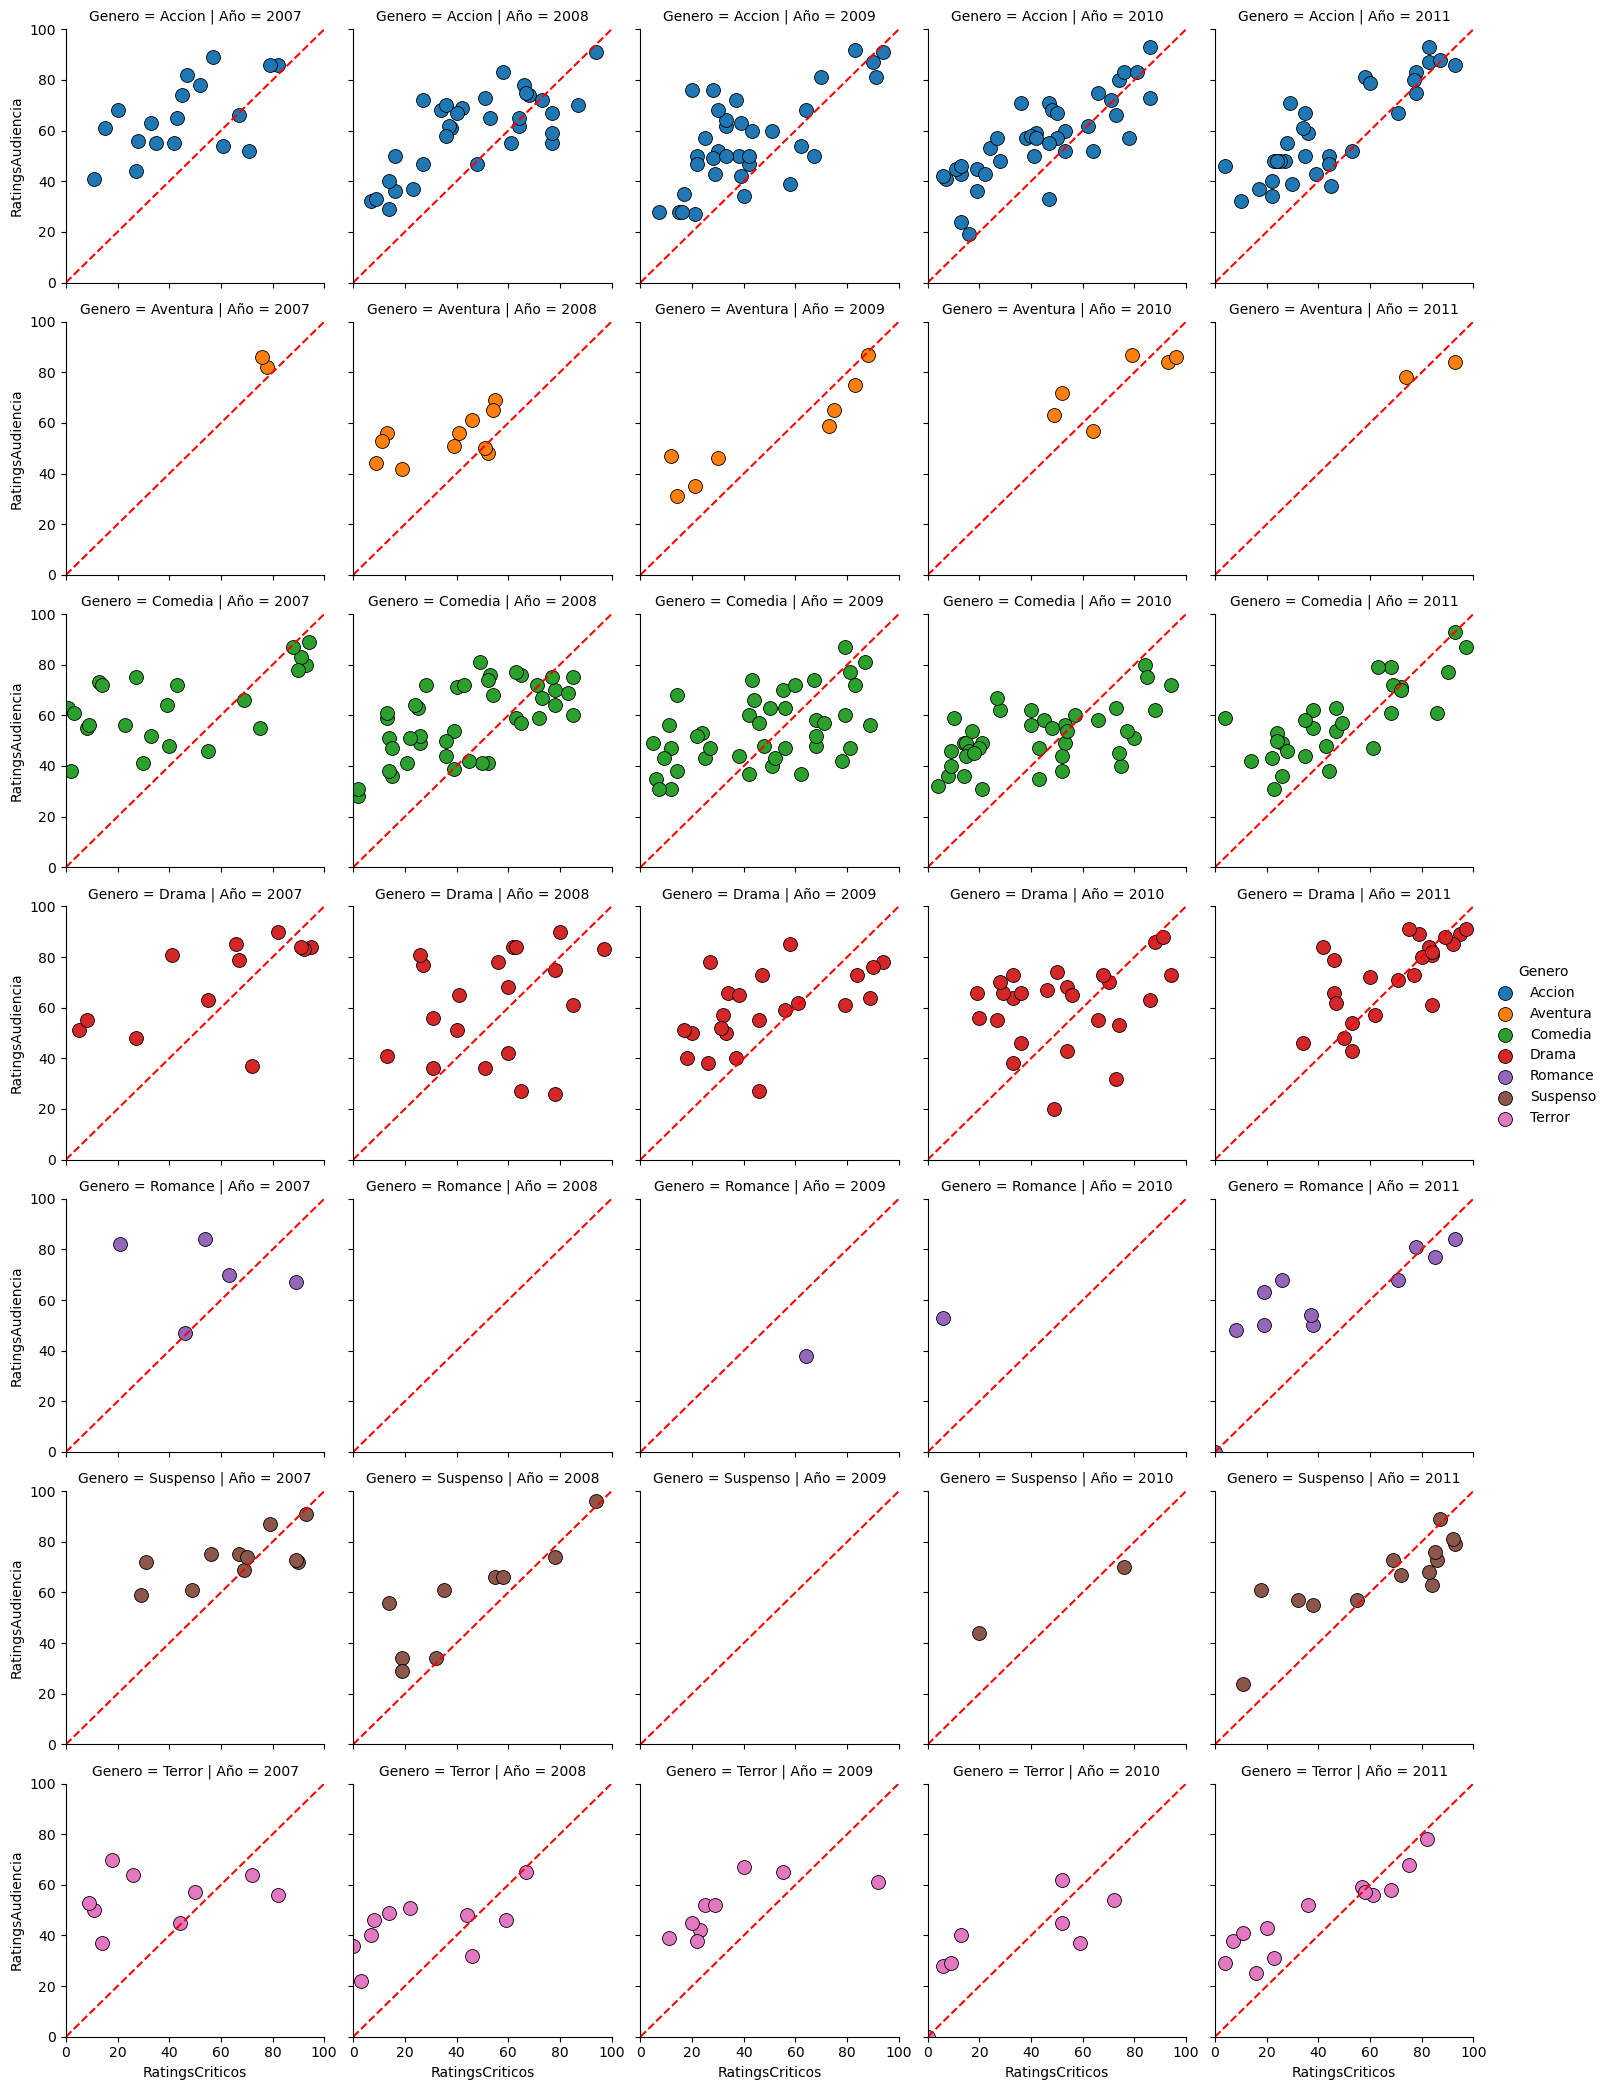

In [23]:
#Controlando ejes y Agregando Diagonales.
g = sns.FacetGrid(peliculas, row='Genero', col = 'Año', hue='Genero')  
kws= dict(s=100, linewidth = 0.6, edgecolor ='black')
g= g.map(plt.scatter, 'RatingsCriticos', 'RatingsAudiencia', **kws) 
g.set(xlim =(0,100), ylim=(0,100))  #definimos los limites de los ejes para x y para y
for ax in g.axes.flat:  #vamos a iterar en cada uno de los arreglos que vemos, y aplanamos (flat) como si fuera una lista
    ax.plot((0,100),(0,100), c='red', ls='--')   #para dibujar una línea diagonal en cada uno de los gráficos, le damos color con c='' y estilo con ls

#añadimos leyenda 
g.add_legend()

---

<h2 style='color: red;text-align:center;'>BONUS: construir Dashboards</h2>

---

Un Dashboard es una combinación de gráficos o sets de información.  
Para ello usaremos sns

In [26]:
#los imports para que no se olviden
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

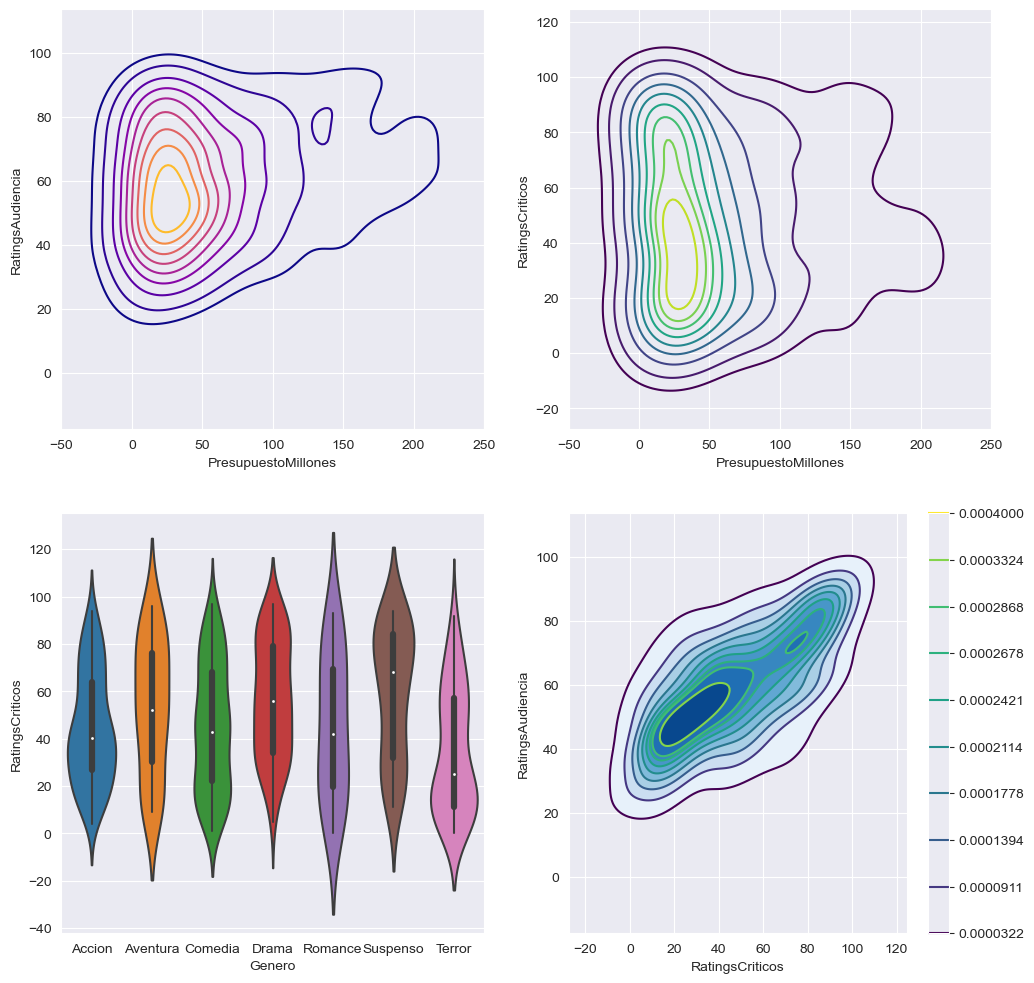

In [27]:
sns.set_style('darkgrid')
f, axes = plt.subplots(2,2, figsize=(12,12))  #la f significa figure
k1= sns.kdeplot(x=peliculas.PresupuestoMillones, y=peliculas.RatingsAudiencia, cmap='plasma', ax =axes[0,0])

k2= sns.kdeplot(x=peliculas.PresupuestoMillones, y=peliculas.RatingsCriticos, cmap='viridis', ax =axes[0,1])

v3 = sns.violinplot(data=peliculas, x = 'Genero', y='RatingsCriticos', ax =axes[1,0])

k4 = sns.kdeplot(x=peliculas.RatingsCriticos, y=peliculas.RatingsAudiencia, shade=True,cmap='Blues', ax =axes[1,1])
# bordes de k4.
k4b = sns.kdeplot(x=peliculas.RatingsCriticos, y=peliculas.RatingsAudiencia, cmap='viridis',cbar=True, ax =axes[1,1]) #remarcamos los bordes

k1.set(xlim=(-50,250))
k2.set(xlim=(-50,250))
plt.show()

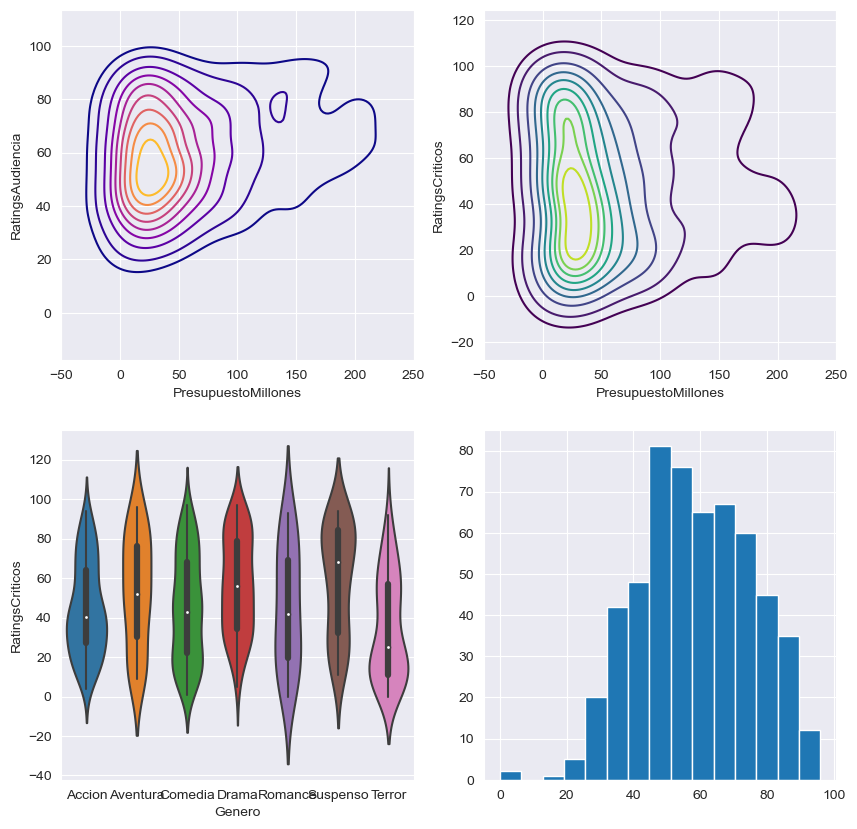

In [47]:
#si metemos graficos que no han sido creados con seaborn

sns.set_style('darkgrid')
f, axes = plt.subplots(2,2, figsize=(10,10))  #la f significa figure
k1= sns.kdeplot(x=peliculas.PresupuestoMillones, y=peliculas.RatingsAudiencia, cmap='plasma', ax =axes[0,0])

k2= sns.kdeplot(x=peliculas.PresupuestoMillones, y=peliculas.RatingsCriticos, cmap='viridis', ax =axes[0,1])

v3 = sns.violinplot(data=peliculas, x = 'Genero', y='RatingsCriticos', ax =axes[1,0])

#grafico no creado con seaborn, si ponemos es histograma como hemos metido el resto:
# n1 = plt.hist(peliculas.RatingsAudiencia, bins=15, ax=axes[1,1])  #nos da un Error: Axes.hist() got multiple values for argument 'ax'
#da este error porque se se meten diferente, si no es con sns hay que dar la poosición primero axes[].grafico
axes[1,1].hist(peliculas.RatingsAudiencia, bins=15)
k1.set(xlim=(-50,250))
k2.set(xlim=(-50,250))
plt.show()

#esto pasa porque axes es un objeto de pyplot, y axes viene de plt.subplot por lo que se está creando dentro del paquete de pyplot
#y como sns son unos graficos que se crean por encima de pyplot, axes no sabe que existe el kdeplot ni ningún gráfico sns por eso se le da
#el axes[] dentro de sus gráficos con el ax=axes[] es una manera de pasar axes por medio de un argumento dentro de la creación del gráfico
# REcordar que seaborn vino después y es el modo de solucionar esto.

---

<h2 style='color: green;text-align:center;'>BONUS.2: TIPS para dar Estilo</h2>

---

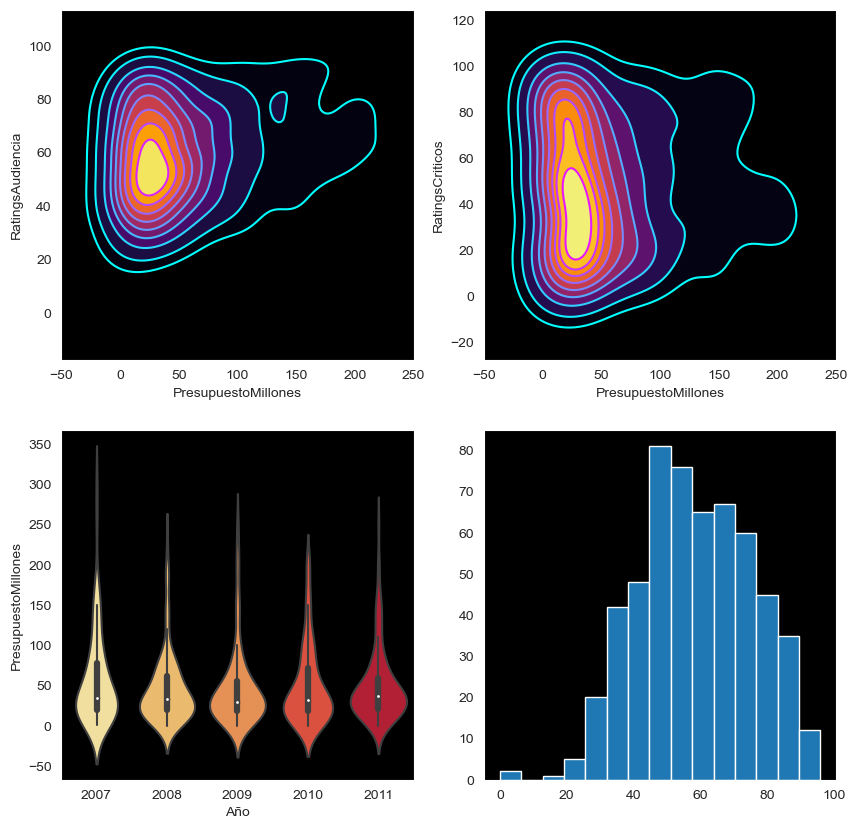

In [181]:
#vamos a dar estilo al Dashboard

sns.set_style('dark',{'axes.facecolor':'black'}) 
#estilos posibles white, whitegrid, dark, darkgrid, ticks
#metemos un diccionario para poner el color black de fondo en los graficos
f, axes = plt.subplots(2,2, figsize=(10,10))  #la f significa figure

#Grafico [0,0]
k1= sns.kdeplot(x=peliculas.PresupuestoMillones, y=peliculas.RatingsAudiencia, cmap='inferno',shade=True, ax =axes[0,0])
k1b= sns.kdeplot(x=peliculas.PresupuestoMillones, y=peliculas.RatingsAudiencia, cmap='cool',ax =axes[0,0])


#Grafico [0,1]
k2= sns.kdeplot(x=peliculas.PresupuestoMillones, y=peliculas.RatingsCriticos, cmap='inferno', fill=True,common_grid=True,ax =axes[0,1])
k2b= sns.kdeplot(x=peliculas.PresupuestoMillones, y=peliculas.RatingsCriticos, cmap='cool', ax =axes[0,1])


#Grafico [1,0]
v3 = sns.violinplot(data=peliculas, x = 'Año', y='PresupuestoMillones',palette='YlOrRd', ax =axes[1,0]) 
#para violin los colores se cambian con palette

#Grafico [1,1]
axes[1,1].hist(peliculas.RatingsAudiencia, bins=15)

k1.set(xlim=(-50,250))
k2.set(xlim=(-50,250))
plt.show()


---

<h2 style='color: green;text-align:center;'>BONUS.3: DETALLICOS</h2>

---

In [ ]:
#cambios Temáticos

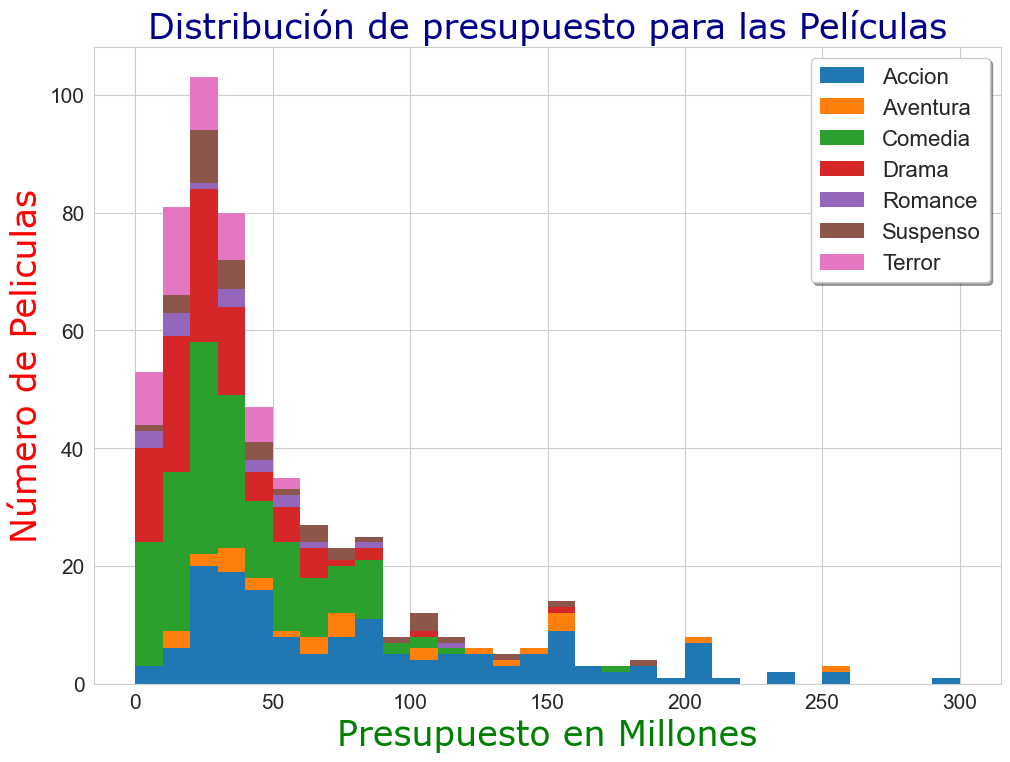

In [74]:
#vamos a trabajar sobre el histograma apilado
sns.set_style('whitegrid') 

lista1=list()
mis_etiquetas = list()

for gen in peliculas.Genero.cat.categories:
    lista1.append(peliculas[peliculas.Genero == gen].PresupuestoMillones)
    mis_etiquetas.append(gen)

#usamos un subplot, para crear dentro de la figura el grafico, así cambiar el tamaño del subplot
fig, ax = plt.subplots(1,1)
fig.set_size_inches(11.7,8.27) #tamaño de una hoja A4
h = plt.hist(lista1, bins=30, stacked=True, rwidth=1, edgecolor='none',label=mis_etiquetas )
plt.legend(prop={'size':16}, frameon=True, fancybox=True, framealpha=1,shadow=True)  #muestra las label

plt.ylabel('Número de Peliculas',fontsize=25, color='red', fontname='Verdana')
plt.xlabel('Presupuesto en Millones',fontsize=25, color='Green', fontname='Verdana')
plt.yticks(fontsize=15), plt.xticks(fontsize=15)

#titulo y estilos para title
plt.title('Distribución de presupuesto para las Películas', fontsize=25, color='DarkBlue', fontname='Verdana')
plt.show() #quita la linea de comando que sale al generar el grafico

---